# Plot the log-likelihood contours of a distribution

In this example, we show how to plot the bidimensionnal log-likelihood contours of function given a sample.

In [1]:
import openturns as ot
ot.RandomGenerator.SetSeed(0)

We create a `TruncatedNormal` and generate a small sample.

In [2]:
a = -1
b=2.5
mu = 2.
sigma = 3.
distribution = ot.TruncatedNormal(mu,sigma,a,b)
sample = distribution.getSample(11)

In order to see the distribution and the sample, we draw the PDF of the distribution and generate a clouds which X coordinates are the sample values.

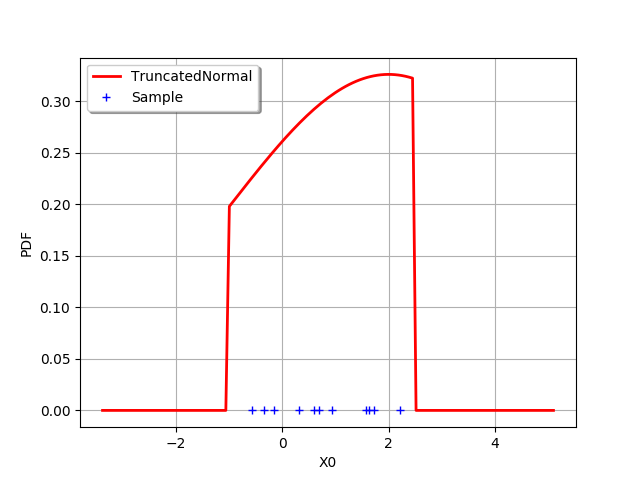

In [3]:
import openturns.viewer as otv
graph = distribution.drawPDF()
graph.setLegends(["TruncatedNormal"])
graph.setColors(["red"])
zeros = ot.Sample(sample.getSize(),1)
cloud = ot.Cloud(sample,zeros)
cloud.setLegend("Sample")
graph.add(cloud)
graph.setLegendPosition("topleft")
graph

The following function computes the log-likelihood of a `TruncatedNormal` which mean and standard deviations are given as input arguments. The lower and upper bounds of the distribution are computed as minimum and maximum of the sample.

In [4]:
def logLikelihood(mu,sigma):
    a = sample.getMin()[0]
    b = sample.getMax()[0]
    distribution = ot.TruncatedNormal(mu,sigma,a,b)
    samplesize = sample.getSize()
    likelihood = 0.
    for i in range(samplesize):
        likelihood -= distribution.computeLogPDF(sample[i])
    return likelihood

In order to create the contour plot, we have to evaluate the log-likelihood function on a grid. This is easy with the `meshgrid` numpy function.

In [5]:
import numpy as np
mu = np.linspace(-3.0, 5.0, 50)
sigma = np.linspace(0.1, 7.0, 50)
MU, SIGMA = np.meshgrid(mu, sigma)
nmu = MU.shape[0]
nsigma = mu.shape[0]
Z = np.zeros((nmu,nsigma))
for i in range(nmu):
    for j in range(nsigma):
        Z[i,j] = logLikelihood(MU[i,j],SIGMA[i,j])

print(np.min(Z),np.max(Z))

718.5554193435169 5697.465161108013


We use the `contour` function from matplotlib. In order to plot exactly the required contours, we set the `levels` option, which has been fine-tune for this particular graphics.

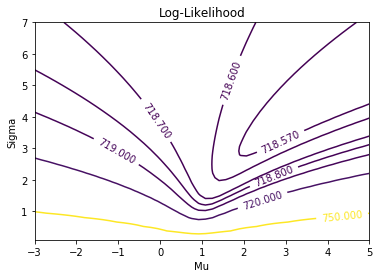

In [6]:
import matplotlib.pyplot as plt

levels = [718.57, 718.6, 718.7, 718.8, 719.,720., 750.]

fig, ax = plt.subplots()
CS = ax.contour(MU, SIGMA, Z, levels = levels)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Log-Likelihood')
ax.set_xlabel("Mu")
ax.set_ylabel("Sigma");

We see that the minimum of the log-likelihood function is in the top right corner of the (mu,sigma) domain.